<a href="https://colab.research.google.com/github/rajadhikary411/190109-CNN-/blob/main/190109_CNN_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:

!rm -rf 190109-CNN-


!git clone https://github.com/rajadhikary411/190109-CNN-.git

%cd 190109-CNN-



Cloning into '190109-CNN-'...
remote: Enumerating objects: 60, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 60 (delta 0), reused 1 (delta 0), pack-reused 57 (from 1)
Receiving objects: 100% (60/60), 169.15 MiB | 27.96 MiB/s, done.
Resolving deltas: 100% (15/15), done.
Updating files: 100% (19/19), done.
/content/190109-CNN-


In [12]:

!ls



CNN_Image_Classification_ipynb.ipynb  data  model  README.md


In [13]:
!ls data/custom



Airplane.jpg	Bird.jpg  Deer.jpg  Horse.jpg  Truck.jpg
Automobile.jpg	cat.jpg   Dog.jpg   ship.jpg


In [14]:
import torch
import torchvision
import matplotlib
import seaborn
import sklearn
import PIL

print("All required libraries are available.")


All required libraries are available.


In [15]:
print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)


PyTorch version: 2.9.0+cpu
Torchvision version: 0.24.0+cpu


In [16]:
#Enable GPU
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)



Using device: cpu


In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np
import os

from PIL import Image
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [19]:
classes = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]


In [20]:
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.4914, 0.4822, 0.4465],
        std=[0.2470, 0.2435, 0.2616]
    )
])


In [21]:
trainset = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

testset = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    download=True,
    transform=transform
)


100%|██████████| 170M/170M [00:03<00:00, 49.5MB/s]


In [22]:
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
testloader  = DataLoader(testset, batch_size=64, shuffle=False)


In [23]:
class ImprovedCNN(nn.Module):
    def __init__(self):
        super().__init__()

        self.features = nn.Sequential(
            nn.Conv2d(3, 64, 3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(64, 128, 3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(128, 256, 3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        self.classifier = nn.Sequential(
            nn.Linear(256*4*4, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        return self.classifier(x)


In [25]:
model = ImprovedCNN().to(device)

In [33]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
epochs = 10


In [40]:
# Example: simple CNN for CIFAR-10
import torch.nn as nn
import torch.nn.functional as F

class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64*8*8, 256)
        self.fc2 = nn.Linear(256, 10)  # CIFAR-10: 10 classes

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64*8*8)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Device setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Using device:", device)

# Model, loss, optimizer
model = CNNModel()
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


Using device: cpu


In [41]:
os.makedirs("model", exist_ok=True)
torch.save(model.state_dict(), "model/cnn_cifar10.pth")


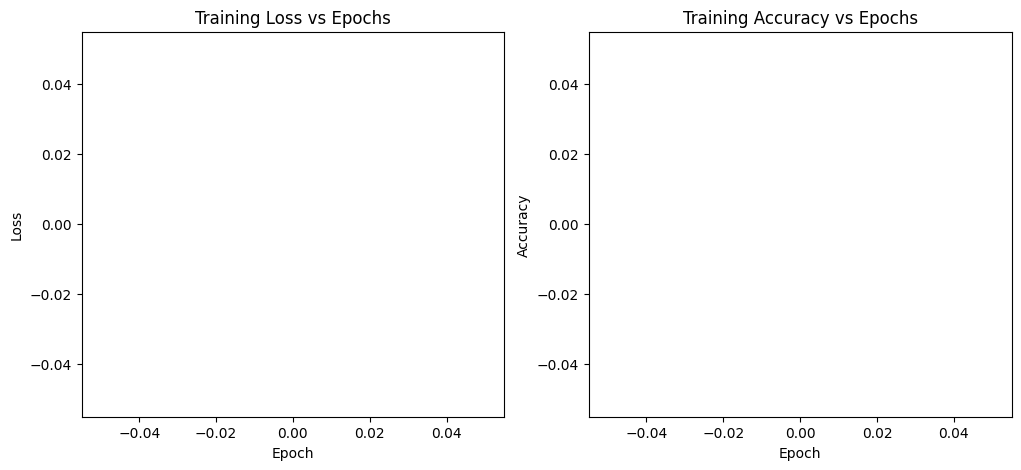

In [42]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(train_losses)
plt.title("Training Loss vs Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.subplot(1,2,2)
plt.plot(train_accs)
plt.title("Training Accuracy vs Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.show()


In [43]:
model.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = outputs.max(1)

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())


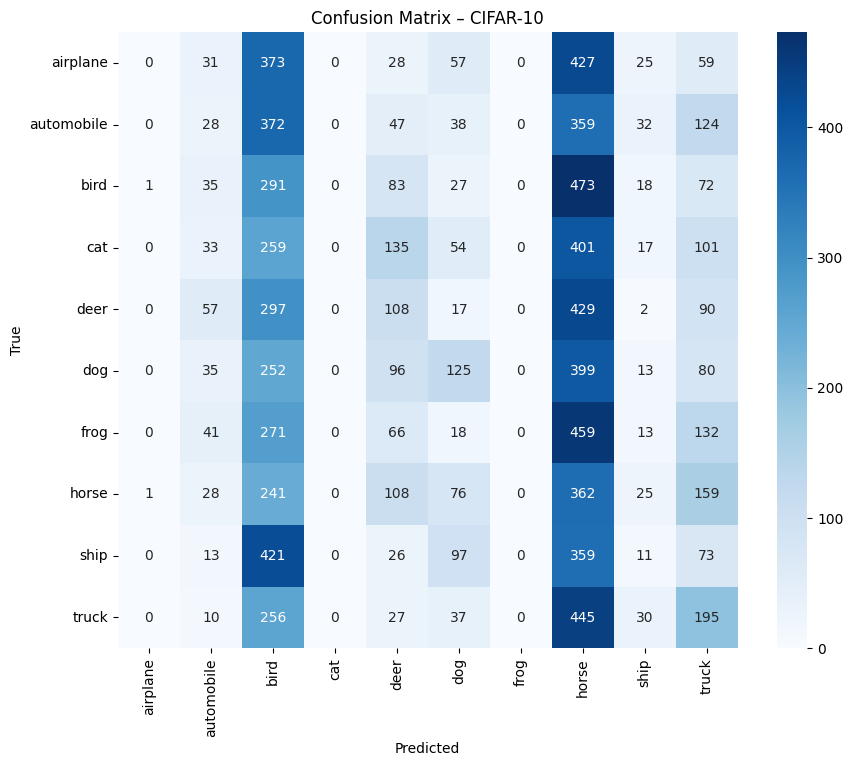

In [44]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=classes,
            yticklabels=classes,
            cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix – CIFAR-10")
plt.show()


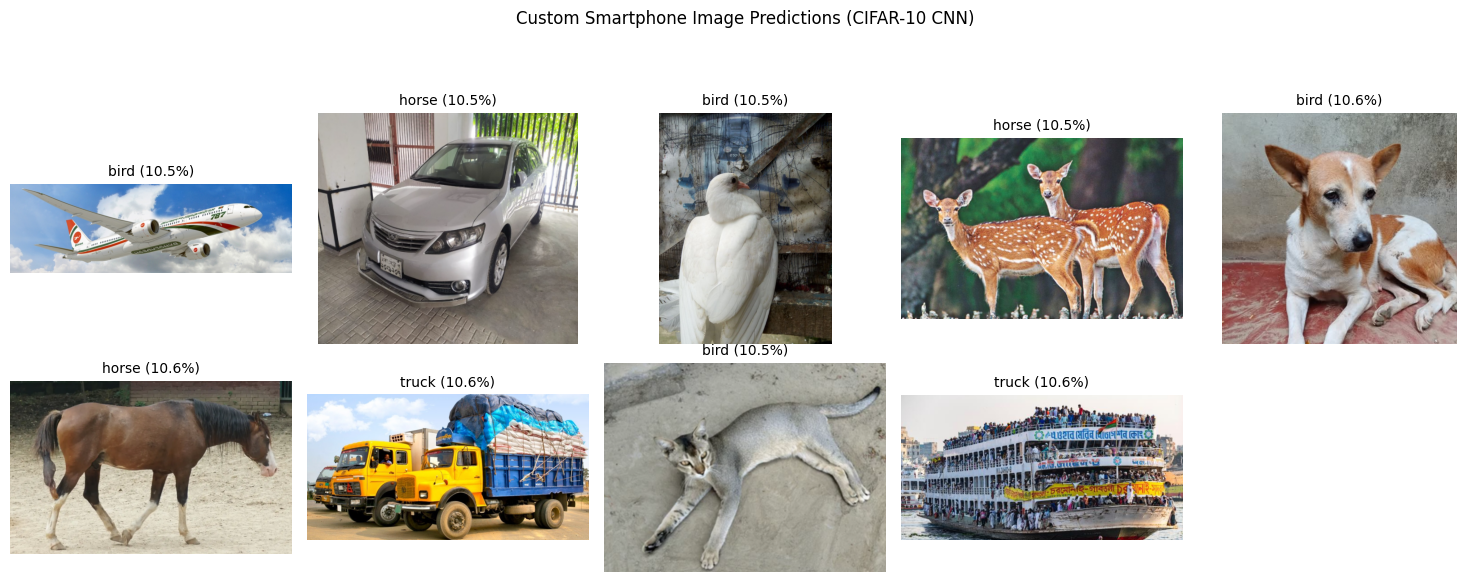

In [45]:
custom_dir = "data/custom"
images = sorted(os.listdir(custom_dir))  # keep order stable

model.eval()
plt.figure(figsize=(15, 6))

for i, img_name in enumerate(images):
    img_path = os.path.join(custom_dir, img_name)
    img = Image.open(img_path).convert("RGB")

    img_t = transform(img).unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(img_t)
        probs = torch.softmax(output, dim=1)
        conf, pred = torch.max(probs, 1)

    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.title(
        f"{classes[pred.item()]} ({conf.item()*100:.1f}%)",
        fontsize=10
    )
    plt.axis("off")

plt.suptitle("Custom Smartphone Image Predictions (CIFAR-10 CNN)")
plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()


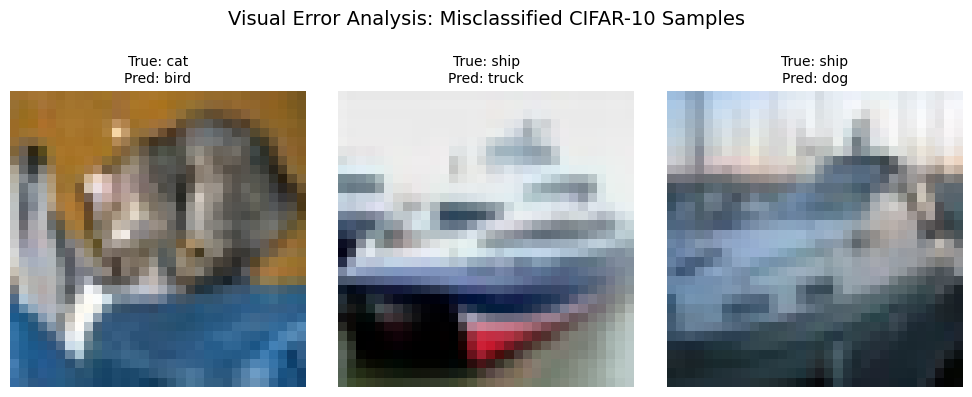

In [46]:
incorrect = []

model.eval()
with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)

        for img, true_label, pred_label in zip(images, labels, preds):
            if true_label != pred_label:
                incorrect.append(
                    (img.cpu(), true_label.item(), pred_label.item())
                )

            if len(incorrect) == 3:
                break

        if len(incorrect) == 3:
            break

plt.figure(figsize=(10, 4))

mean = torch.tensor([0.4914, 0.4822, 0.4465])
std  = torch.tensor([0.2470, 0.2435, 0.2616])

for i, (img, true_cls, pred_cls) in enumerate(incorrect):
    plt.subplot(1, 3, i + 1)

    img = img.permute(1, 2, 0)
    img = img * std + mean
    img = img.clamp(0, 1)

    plt.imshow(img)
    plt.title(f"True: {classes[true_cls]}\nPred: {classes[pred_cls]}", fontsize=10)
    plt.axis("off")

plt.suptitle("Visual Error Analysis: Misclassified CIFAR-10 Samples", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()
